In [10]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

In [11]:
ex1data2 = np.loadtxt("../../models/ex1data2.txt", delimiter=',')

In [12]:
m = ex1data2.shape[0]
raw_x, y = ex1data2[:, 0:2], ex1data2[:, 2]
for i in range(10):
    print(f'x={raw_x[i]} y={y[i]}')

x=[2104.    3.] y=399900.0
x=[1600.    3.] y=329900.0
x=[2400.    3.] y=369000.0
x=[1416.    2.] y=232000.0
x=[3000.    4.] y=539900.0
x=[1985.    4.] y=299900.0
x=[1534.    3.] y=314900.0
x=[1427.    3.] y=198999.0
x=[1380.    3.] y=212000.0
x=[1494.    3.] y=242500.0


In [13]:
def feature_normalize(x):
    mu = np.mean(x, axis=0)
    sigma = np.std(x, axis=0)
    return (x - mu) / sigma, mu, sigma


x, mu, sigma = feature_normalize(raw_x)

def append_ones(x):
    return np.hstack((np.ones((m, 1)), x))

x = append_ones(x)
x

array([[ 1.00000000e+00,  1.31415422e-01, -2.26093368e-01],
       [ 1.00000000e+00, -5.09640698e-01, -2.26093368e-01],
       [ 1.00000000e+00,  5.07908699e-01, -2.26093368e-01],
       [ 1.00000000e+00, -7.43677059e-01, -1.55439190e+00],
       [ 1.00000000e+00,  1.27107075e+00,  1.10220517e+00],
       [ 1.00000000e+00, -1.99450507e-02,  1.10220517e+00],
       [ 1.00000000e+00, -5.93588523e-01, -2.26093368e-01],
       [ 1.00000000e+00, -7.29685755e-01, -2.26093368e-01],
       [ 1.00000000e+00, -7.89466782e-01, -2.26093368e-01],
       [ 1.00000000e+00, -6.44465993e-01, -2.26093368e-01],
       [ 1.00000000e+00, -7.71822042e-02,  1.10220517e+00],
       [ 1.00000000e+00, -8.65999486e-04, -2.26093368e-01],
       [ 1.00000000e+00, -1.40779041e-01, -2.26093368e-01],
       [ 1.00000000e+00,  3.15099326e+00,  2.43050370e+00],
       [ 1.00000000e+00, -9.31923697e-01, -2.26093368e-01],
       [ 1.00000000e+00,  3.80715024e-01,  1.10220517e+00],
       [ 1.00000000e+00, -8.65782986e-01

In [14]:
alpha = 1
num_iters = 20
theta = np.zeros((3, 1))

In [15]:
def compute_cost(x, y, theta):
    m = y.size
    l = x @ theta - y.reshape((m, 1))
    return (l.T @ l / 2 / m).item()


def gradient_descent_multi(x, y, theta, alpha, num_iters):
    m = y.size
    j_history = list()
    for _ in range(num_iters):
        l = x @ theta - y.reshape((m, 1))
        k = x.T @ l
        theta = theta - alpha / m * k
        j_history.append(compute_cost(x, y, theta))
    return theta, j_history


# > Подсказка. В частности, если вы все правильно реализуете, то насколько сильно будет
# > отличаться код для однофакторной регрессии от кода для многофакторной регрессии?
# Никак ¯\_(ツ)_/¯

theta, j_history = gradient_descent_multi(x, y, theta, alpha, num_iters)
print(theta.flatten())

[340412.65957447 109446.79079183  -6578.29440794]


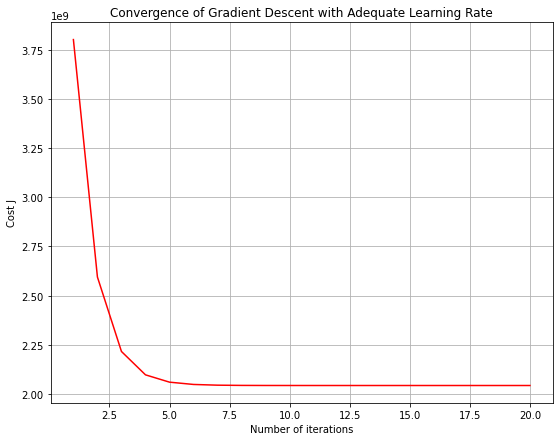

In [16]:
fig, ax = plt.subplots(figsize=(9, 7))
ax.plot(np.arange(1, len(j_history) + 1), j_history, color='red')
ax.set(xlabel='Number of iterations', ylabel='Cost J',
        title='Convergence of Gradient Descent with Adequate Learning Rate')
ax.grid()

In [17]:
def normal_equation(x, y):
    return np.linalg.inv(x.T @ x) @ (x.T @ y)

normal_theta = normal_equation(append_ones(raw_x), y)
print(normal_theta.flatten())

[89597.9095428    139.21067402 -8738.01911233]


In [18]:
def predict_price(sqf, br, theta, mu, sigma):
    normalized_data = (np.array([[sqf, br]]) - mu) / sigma
    query = np.hstack((np.ones((1, 1)), normalized_data))
    result = query @ theta
    return result.item()


print('Predicted price of a 1650 sq-mt, 3 br house (using gradient descent):')
print(predict_price(1650, 3, theta, mu, sigma))

print('Predicted price of a 1650 sq-mt, 3 br house (using normal equations):')
print(predict_price(1650, 3, normal_theta, 0, 1))

Predicted price of a 1650 sq-mt, 3 br house (using gradient descent):
293081.89924482163
Predicted price of a 1650 sq-mt, 3 br house (using normal equations):
293081.4643348973
